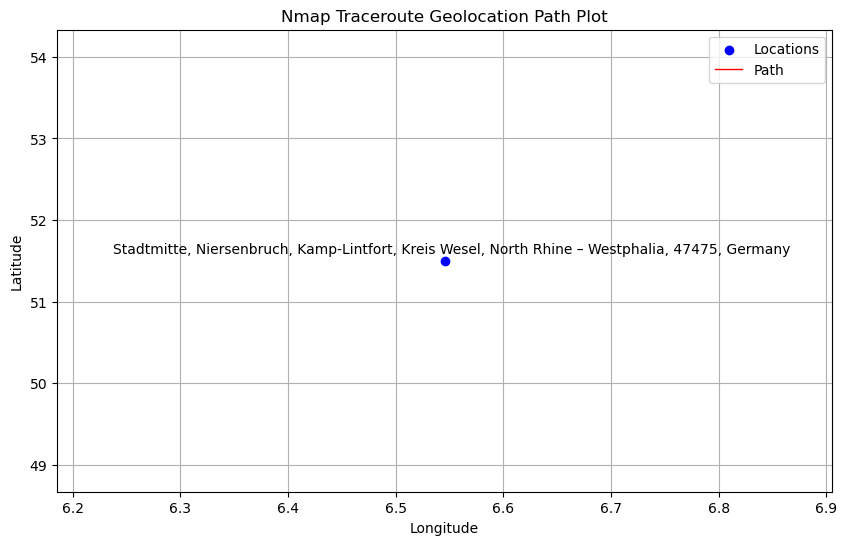

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Read Nmap traceroute geolocation data from an XML file
xml_file = "./hsrw_trace.xml"

# Parse the XML file
tree = ET.parse(xml_file)
root = tree.getroot()

# Initialize lists to store latitude, longitude, and location names
latitudes = []
longitudes = []
locations = []

# Instantiate a Nominatim client
geolocator = Nominatim(user_agent="nmap_geolocation")


#hsrw coords: 51.500914721526925, 6.545284997122894
start_coords = (51.500914721526925, 6.545284997122894)


hop_index = 0

latitudes.append(float(start_coords[0]))
longitudes.append(float(start_coords[1]))

location = geolocator.reverse((start_coords[0], start_coords[1]), language="en")
location_name = location.raw.get("display_name", "Unknown Location")
locations.append(location_name)



# Extract data from the XML
for table in root.findall('.//table'):
    #print("Table:")
    latitude = 0.0
    longitude = 0.0
    for elem in table.findall('elem'):
        
        #make a JSON object for every hop?
        
        
        key = elem.get("key")
        value = elem.text
        
        if key == "ip":
            ip = value
        if key == "lat":
            latitude = value
            latitudes.append(float(latitude))
        if key == "lon":
            longitude = value
            longitudes.append(float(longitude))
        if key == "hop":
            hop = value
            hop_index = hop_index + 1
            

        #print(type(hop))
        #print(f'  Key: {key}, Value: {value}')
    #print("lat: ", latitude)
    #print("lon: ", longitude,"\n")
    

    if latitude != 0.0 and longitude != 0.0:
        
        # Reverse geocode to get location name
        location = geolocator.reverse((latitude, longitude), language="en")
        location_name = location.raw.get("display_name", "Unknown Location")
        locations.append(location_name)


   
    #print("\n")
    
#print(hop_index)

#print(latitudes)
#print(len(latitudes))

#print(longitudes)
#print(len(longitudes))
#latitudes.remove(0.0)    
#longitudes.remove(0.0) 

'''
for loc in locations:
    print(loc)
    print("\n")
'''

#print(len(locations))




# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, marker='o', color='b', label="Locations")

# Connect the points with a line
plt.plot(longitudes, latitudes, color='r', linestyle='-', linewidth=1, label="Path")

# Add labels to the points
for i, loc in enumerate(locations):
    plt.annotate(loc, (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Customize the plot
plt.title("Nmap Traceroute Geolocation Path Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()




In [2]:
import xml.etree.ElementTree as ET


# Read Nmap traceroute geolocation data from an XML file
xml_file = "./trace.xml"

# Parse the XML file
tree = ET.parse(xml_file)
root = tree.getroot()


ip_adresses = []



# Extract data from the XML
for table in root.findall('.//table'):
    latitude = 0.0
    longitude = 0.0
    for elem in table.findall('elem'):
        key = elem.get("key")
        value = elem.text
        if key == "ip":
            ip = value
            ip_adresses.append(ip)
        if key == "lat":
            latitude = value
        if key == "lon":
            longitude = value
        if key == "hop":
            hop = value



In [3]:
import platform
import requests
import ipinfo
import json
from geopy.geocoders import Nominatim

from dotenv import load_dotenv
import os


# Load the .env file, replace the value of 'API_ACCESS_TOKEN' with yours
load_dotenv()

# Access the token
access_token = os.getenv("API_ACCESS_TOKEN")





# Instantiate a Nominatim client
geolocator = Nominatim(user_agent="nmap_geolocation")


latitudes = []
longitudes = []
locations = []



# HSRW coords: 51.500914721526925, 6.545284997122894
start_coords = (51.500914721526925, 6.545284997122894)

latitudes.append(float(start_coords[0]))
longitudes.append(float(start_coords[1]))

location = geolocator.reverse((start_coords[0], start_coords[1]), language="en")
location_name = location.raw.get("display_name", "Unknown Location")
locations.append(location_name)




for ip in ip_adresses:
    handler = ipinfo.getHandler(access_token)
    match = handler.getDetails(ip)
    
    #data = json.loads(details)
    #print(type(details))
    
    if match.details.get('loc', None) != None:
        
        latitude = float(match.details.get('latitude'))
        longitude = float(match.details.get('longitude') )
        latitudes.append(latitude)
        longitudes.append(longitude)
        
        location = geolocator.reverse((latitude, longitude), language="en")
        location_name = location.raw.get("display_name", "Unknown Location")
        locations.append(location_name)
    


In [4]:
#print(latitudes)
#print(longitudes)

print(ip_adresses)

['192.168.1.1', '10.180.8.1', '172.17.1.1', '172.17.0.105', '188.1.237.197', '185.199.108.153']


<Figure size 640x480 with 0 Axes>

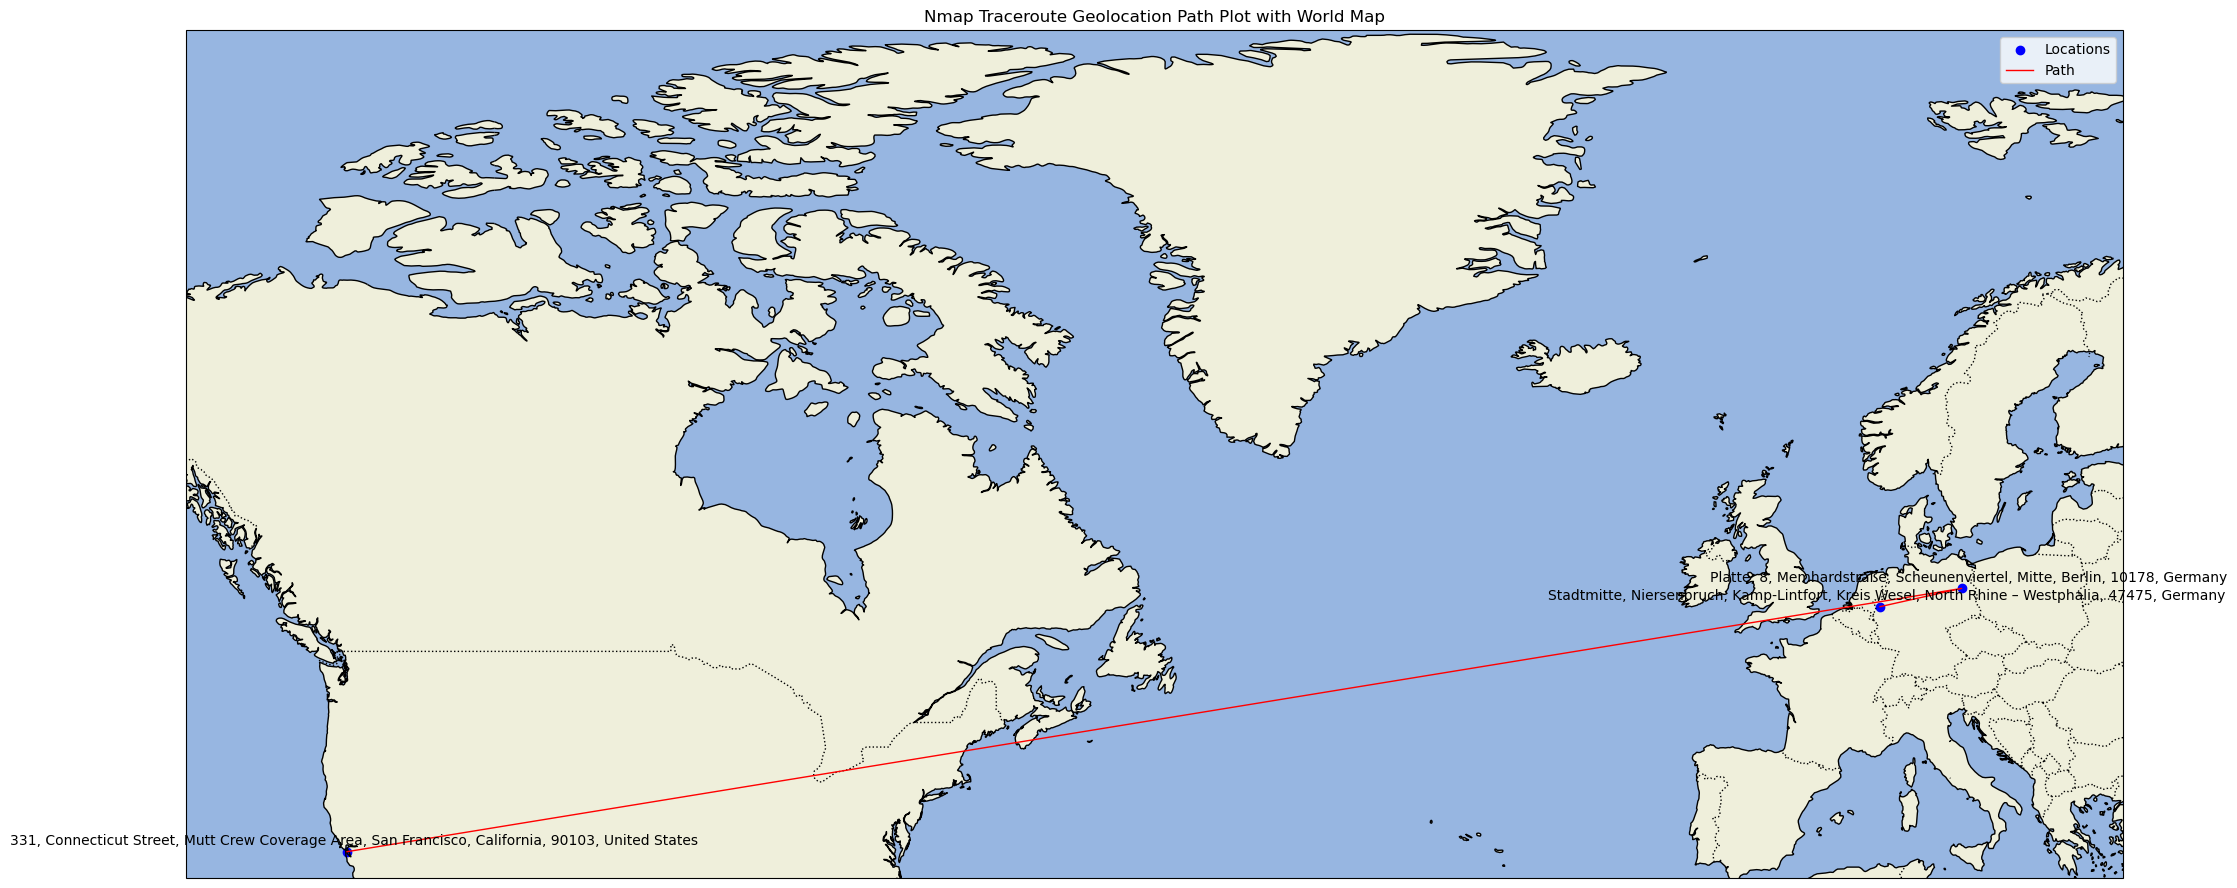

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature    
        
plt.clf() 

# Determine the extent of the plot
min_lat, max_lat = min(latitudes), max(latitudes)
min_lon, max_lon = min(longitudes), max(longitudes)

# Add margins
lat_margin = (max_lat - min_lat) * 0.1  # 10% margin
lon_margin = (max_lon - min_lon) * 0.1  # 10% margin

# Create a plot with a world map
plt.figure(figsize=(25, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent of the map with added margins
ax.set_extent([min_lon - lon_margin, max_lon + lon_margin, min_lat - lat_margin, max_lat + lat_margin])

# Add the features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the points
plt.scatter(longitudes, latitudes, marker='o', color='b', label="Locations", transform=ccrs.PlateCarree())

# Connect the points with a line
plt.plot(longitudes, latitudes, color='r', linestyle='-', linewidth=1, label="Path", transform=ccrs.PlateCarree())

# Add labels to the points
for i, loc in enumerate(locations):
    plt.annotate(loc, (longitudes[i], latitudes[i]), textcoords="offset points", xytext=(5, 5), ha='center', transform=ccrs.PlateCarree())

# Customize the plot
plt.title("Nmap Traceroute Geolocation Path Plot with World Map")
plt.legend()

# Set the aspect ratio
ax.set_aspect(1.5/1.0)  # This will make the x-axis 1.5 times larger than the y-axis

# Save the plot as PDF and PNG
plt.savefig("nmap_traceroute_plot.pdf")
plt.savefig("nmap_traceroute_plot.png")

# Show the plot
plt.show()


In [6]:
import numpy as np

# for saving the data since ipinfo.io can cost after the free trial

'''
# Save the array to a CSV file
np.savetxt('crl_longitudes.csv', longitudes, delimiter=';', fmt='%s')
np.savetxt('crl_latitudes.csv', latitudes, delimiter=';', fmt='%s')
np.savetxt('crl_locations.csv', locations, delimiter=';', fmt='%s')
'''


"\n# Save the array to a CSV file\nnp.savetxt('crl_longitudes.csv', longitudes, delimiter=';', fmt='%s')\nnp.savetxt('crl_latitudes.csv', latitudes, delimiter=';', fmt='%s')\nnp.savetxt('crl_locations.csv', locations, delimiter=';', fmt='%s')\n"